## 기계학습 ML 
(1) 목표 설정   
(2) 목표에 맞는 데이터 준비  
    => 파일 형식 수집  
    => 웹 크롤링 수집  
(3) 데이터 전처리
    => 목표에 맞는 데이터 추출
    => 학습 방법에 적합하도록 데이터 가공  
==> (2), (3) : 시간이 가장 많이 걸리고, 중요한 단계  
(4) 학습 진행
    => 목표를 구현하기 위한 최적의 학습 방법 선정  
    => 본인 데이터 맞는 최고 성능을 내는 방법 찾기  
(5) 테스트 진행  
    => 학습에 사용되지 않은 데이터로 학습 완료된 모델(규칙/패턴/수식)에 검사 진행  
    => 만족스러운 겨로가 도출되면 학습 완료  
    => 다시 학습 진행 : 데이터 전처리, 학습 방법, 데이터 양 등 다시 고려



- 데이터셋
    - 형태 1) 피쳐/특성 + 타겟/라벨/정답/클래스
    - 형태 2) 피쳐/특성
    
- 기계학습하기 위해서 데이터셋 준비
    - 학습용 데이터셋
    - 검증용 데이터셋 : 쪽지시험/미니테스트
        - 학습이 제대로 되고 있는지 검증하기 위해서 사용
        - 학습 중단 여부 결정
    - 테스트 데이터셋 : 본시험

- 기계학습의 학습 방법 즉 알고리즘
    - 지도학습
    - 비지도학습
    - 강화학습

### KNN <hr>
  - 유유상종: 끼리끼리 모인다
  - k개의 가장 가까이 존재하는 데이터를 기준으로 결과를 정하는 알고리즘
  - 데이터와 데이터의 거리를 도출해서 거리 순으로 정렬
  - k개 만큼 가까이 있는 데이터 도출
    - 분류 : 다수결 원칙으로 많은 종류의 데이터 결론 도출
    - 회귀 : 데이터의 평균값으로 결과를 도출
  - 특징
    - 데이터의 규칙/패턴을 나타내는 수식 없음
    - 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 => 게으른 학습

### Scikit-learn 패키지
  - 기계학습 방법  
  (1) 학습 모델 인스턴스 생성  
  (2) 학습 메서드 => fit(2D, 1D)  
  (3) 테스트 메서트 => score(2d, 1D)  
  (4) 활용 메서드 => predict(2D) : 결과

### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐  : Weight, Length
- 타 겟  : Species
- 유 형  : 지도학습 / 분류

(1) 모듈 로딩 & 데이터 준비

In [143]:
import pandas as pd                                  # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier   # 기계학습 관련 모듈

import matplotlib.pyplot as plt

In [144]:
data_file = '../DATA/fish.csv'

In [145]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols = [0, 1, 2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [146]:
# Bream, Smelt 품종 행만 추출
mask = fishDF['Species'].isin(['Bream', 'Smelt'])  # Boolean Indexing

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop = True, inplace = True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [147]:
# Bream, Smelt 품종명을 수치화
twoFishDF = twoFishDF.replace({'Bream' : 0, 'Smelt' : 1})
twoFishDF

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0
5,0,450.0,29.7
6,0,500.0,29.7
7,0,390.0,30.0
8,0,450.0,30.0
9,0,500.0,30.7


In [148]:
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int64  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


(2) 데이터 전처리

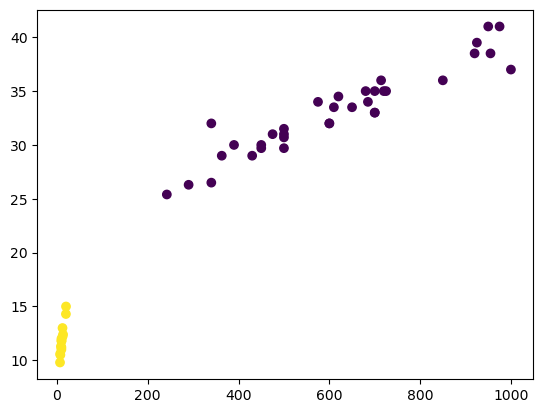

In [149]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인

plt.scatter(twoFishDF['Weight'], twoFishDF['Length'], c = twoFishDF.Species)
plt.show()

(3) 기계학습을 위한 데이터 준비  
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋 : 75%
- 테스트용 데이터셋 : 25%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [150]:
# 데이터 섞기 => frac 매개변수로 비율 조정
ret = twoFishDF.sample(frac=1.)  # 100% 섞기
ret.shape

(49, 3)

In [151]:
twoFishDF = twoFishDF.sample(frac = 1.)
twoFishDF.shape

(49, 3)

In [152]:
# 학습과 테스트 비율 조절 개수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 학습 데이터셋
trainDF = twoFishDF.iloc[:num+1]
testDF = twoFishDF.iloc[num+1:]
print(f'\ntest => {testDF.shape}\n{testDF.tail(3)}')


test => (9, 3)
    Species  Weight  Length
48        1    19.9    15.0
14        0   600.0    32.0
21        0   685.0    34.0


(3-2) Scikit-learn 모듈을 활용한 학습&테스트용 데이터셋 준비

- 추가 모듈 로딩

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
# 특성과 타겟 분리
featureDF = twoFishDF[twoFishDF.columns[1:]]
targetSR = twoFishDF.Species

print(f'featureDF => {featureDF.shape}\n{featureDF.head(2)}')
print(f'featureDF => {targetSR.shape}\n{targetSR.head(2)}')

featureDF => (49, 2)
   Weight  Length
3   363.0    29.0
8   450.0    30.0
featureDF => (49,)
3    0
8    0
Name: Species, dtype: int64


In [155]:
print(f'featureDF => {featureDF.shape}\n{featureDF.head(2)}')

featureDF => (49, 2)
   Weight  Length
3   363.0    29.0
8   450.0    30.0


In [156]:
# -- 비율 설정 없이 학습/테스트셋 분리
# -- [전달] 피쳐 데이터, 타겟 데이터
# -- [기본] shuffle = True
# -- [설정] shuffle = True, train : test = 0.75 : 0.25 --> test_size 매개변수로 비율 조정
# -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR)

In [157]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep = '\n')

print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep = '\n')

# 타겟/클래스 비율
print(f'{y_train.value_counts()/y_train.shape[0]}')
print(f'{y_test.value_counts()/y_test.shape[0]}')

X_train : (36, 2), y_train : (36,)
    Weight  Length
46    12.2    13.0
43     9.8    12.0
46    1
43    1
Name: Species, dtype: int64
X_test : (13, 2), y_test : (13,)
    Weight  Length
33   975.0    41.0
17   700.0    33.0
33    0
17    0
Name: Species, dtype: int64
Species
0    0.666667
1    0.333333
Name: count, dtype: float64
Species
0    0.846154
1    0.153846
Name: count, dtype: float64


In [158]:
# -- 비율 설정하는 학습/테스트셋 분리
# -- [전달] 피쳐 데이터, 타겟 데이터
# -- [기본] shuffle = True
# -- [설정] shuffle = True, train : test = 0.75 : 0.25 => train_size, test_size 매개변수 값 설정
#          분류의 경우 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
# -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size = 0.1,
                                                    stratify = targetSR, random_state = 10)

In [159]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep = '\n')

print(f'\nX_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep = '\n')

# 타겟/클래스 비율
print(f'{y_train.value_counts()/y_train.shape[0]}')
print(f'{y_test.value_counts()/y_test.shape[0]}')

X_train : (44, 2), y_train : (44,)
    Weight  Length
15   600.0    32.0
19   650.0    33.5
15    0
19    0
Name: Species, dtype: int64

X_test : (5, 2), y_test : (5,)
    Weight  Length
11   500.0    31.0
45    13.4    12.4
11    0
45    1
Name: Species, dtype: int64
Species
0    0.704545
1    0.295455
Name: count, dtype: float64
Species
0    0.8
1    0.2
Name: count, dtype: float64


In [160]:
# 검증용 데이터셋 준비
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.1,
                                                  stratify = y_train, random_state = 10)

In [161]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(X_train.head(2), y_train.head(2), sep = '\n')

print(f'\nX_val : {X_val.shape}, y_val : {y_val.shape}')
print(X_train.head(2), y_train.head(2), sep = '\n')

print(f'\nX_test : {X_test.shape}, y_test : {y_test.shape}')
print(X_test.head(2), y_test.head(2), sep = '\n')

X_train : (39, 2), y_train : (39,)
   Weight  Length
2   340.0    26.5
9   500.0    30.7
2    0
9    0
Name: Species, dtype: int64

X_val : (5, 2), y_val : (5,)
   Weight  Length
2   340.0    26.5
9   500.0    30.7
2    0
9    0
Name: Species, dtype: int64

X_test : (5, 2), y_test : (5,)
    Weight  Length
11   500.0    31.0
45    13.4    12.4
11    0
45    1
Name: Species, dtype: int64


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [162]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [163]:
# 학습 진행 => 학습용 데이터 진행
model.fit(X_train, y_train)

KNeighborsClassifier()

(5) 테스트 진행 => 학습에 사용되지 않는 데이터로 진행

In [164]:
model.score(X_val, y_val)

1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행

In [165]:
model.predict(X_test)

array([0, 1, 0, 0, 0], dtype=int64)

In [166]:
y_test

11    0
45    1
32    0
3     0
20    0
Name: Species, dtype: int64

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측  
==> 학습할 때 전달되는 피쳐형태와 동일한 데이터

In [167]:
## 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns = twoFishDF.columns[1:])
new_data

,Weight,Length
0,160,25


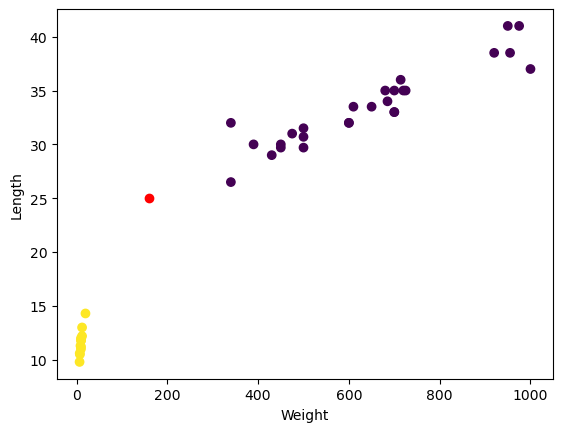

In [168]:
# 새로운 데이터와 학습 데이터의 시각화

# 새로운 데이터
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(X_train.Weight, X_train.Length, c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.ylim()
plt.show()

In [169]:
# 생성된 모델로 새로운 데이터의 분류 예측
model.predict(new_data)

array([1], dtype=int64)

In [170]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data)

index.tolist()[0]

[2, 7, 36, 8, 25]

In [171]:
ind2 = index.tolist()[0]

In [172]:
X_train

,Weight,Length
2,340.0,26.5
9,500.0,30.7
47,19.7,14.3
43,9.8,12.0
39,9.8,11.2
37,7.0,10.6
36,7.5,10.5
46,12.2,13.0
41,10.0,11.8
14,600.0,32.0


In [173]:
X_train.loc[ind2]

,Weight,Length
2,340.0,26.5
7,390.0,30.0
36,7.5,10.5
8,450.0,30.0
25,725.0,35.0


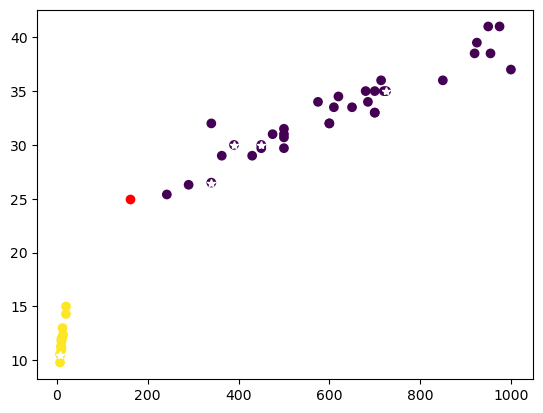

In [174]:
# 새로운 데이터
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 데이터를 정규화하지 않으면 결과가 안좋다.
plt.scatter(twoFishDF.Weight, twoFishDF.Length, c = twoFishDF.Species)
plt.plot(twoFishDF.loc[ind2].Weight, twoFishDF.loc[ind2].Length, 'w*')  # iloc는 위치기반 인덱스이므로 쓰면 안된다.
plt.show()